# Identifying Stationarity using plotting and Statistical testing methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
data = pd.read_csv('./amazon_revenue_profit.csv')
data.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [3]:
data.info() #Quarter is in object format converting into datetime format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quarter     61 non-null     object
 1   Revenue     61 non-null     int64 
 2   Net Income  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [4]:
data = pd.read_csv('./amazon_revenue_profit.csv',parse_dates=['Quarter'])
data.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [6]:
data.set_index('Quarter',inplace=True)

In [7]:
data

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561
...,...,...
2006-03-31,2279,51
2005-12-31,2977,199
2005-09-30,1858,30


# Identifying Stationarity

1) Visualising the Data

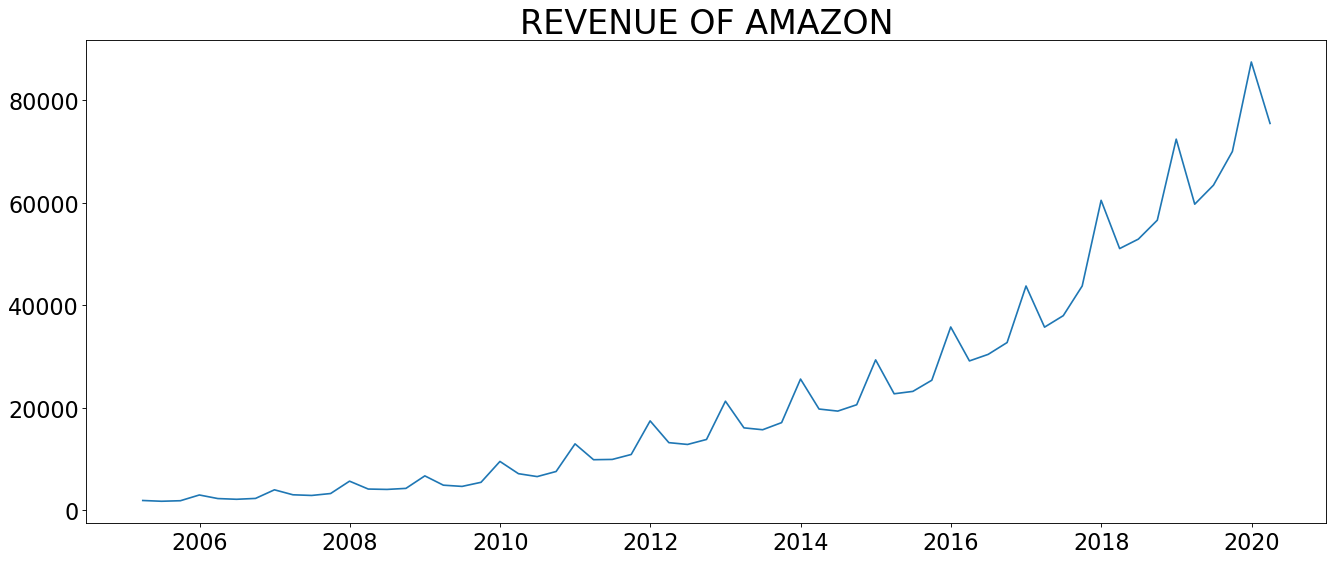

In [8]:
#Plotting Revenue on the line plot.

plt.figure(figsize=(20,8),dpi=80)
plt.title("REVENUE OF AMAZON",fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(data.Revenue)
plt.show()

### The above graph is not stationary visually as the mean is not constant

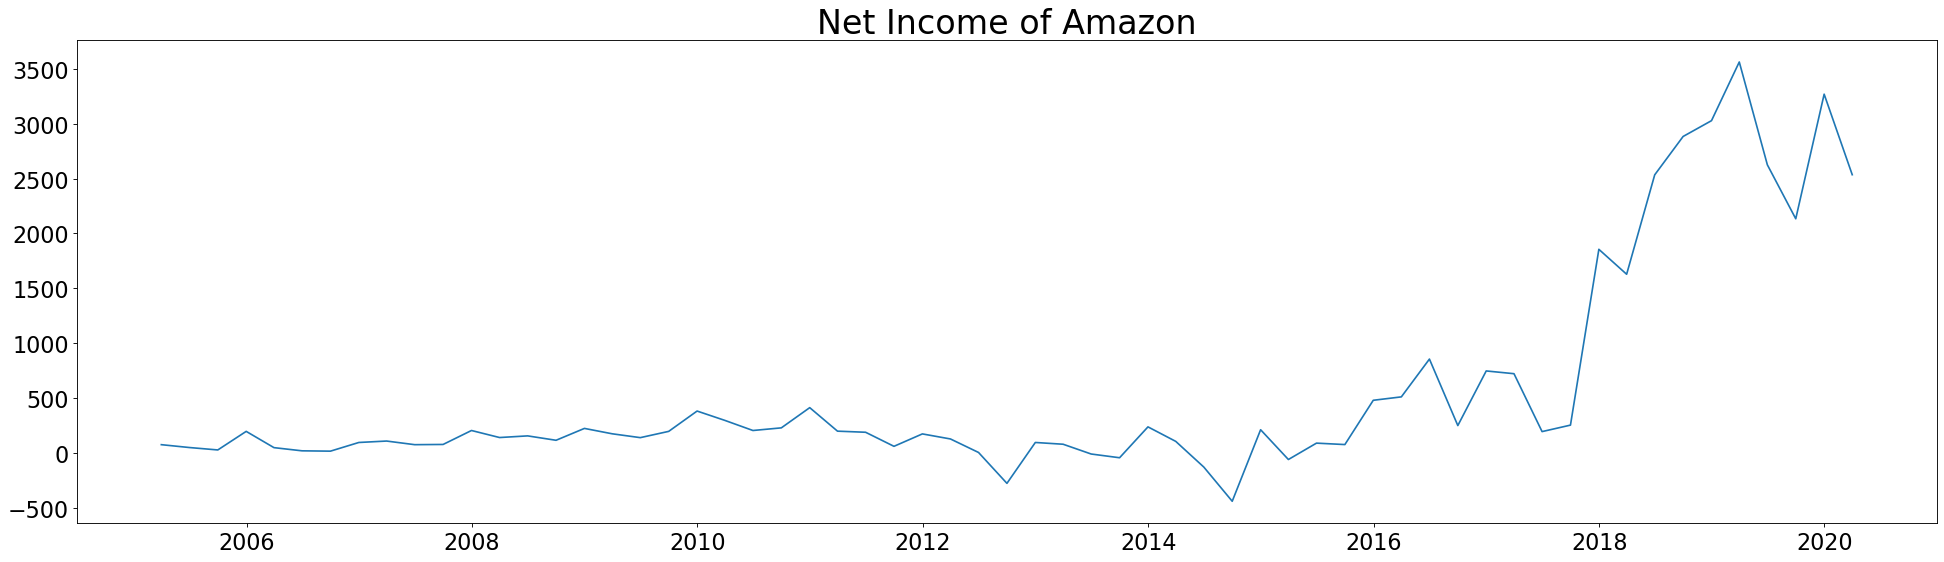

In [9]:
#Plotting the net income on line plot

plt.figure(figsize=(30,8),dpi=80)
plt.title("Net Income of Amazon",fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(data['Net Income'])
plt.show()

### The above graph is not stationary visually as the mean, std. is not constant 

Performing the Statistical test 

1) KPSS test

2) ADF test

In [10]:
#kpss test

from statsmodels.tsa.stattools import kpss

KPSS and ADF are both hypothesis statistical test. To perform it, we need to fix the statement.

for KPSS, if the p value is less than 0.05, we would conclude that the Series is not Stationary.

for ADF, if the p value is less than 0.05, we would conclude that the Series is Stationary.

In [11]:
#if the data follows a trend, we woud use 'ct' function inside kpss.

results = kpss(data['Revenue'],'ct')

/Users/ssameer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [12]:
results

(0.1700516821083097,
 0.029956931576408573,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [13]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[3])


p_value = results[1]



if p_value < 0.05:
     print('The Series is not Stationary')
else:
    print ('The Series is Stationary')


Test Statistics: 0.1700516821083097
p value: 0.029956931576408573
Critical values:
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
The Series is not Stationary


In [14]:
#Now performing kpss test on net income

results = kpss(data['Net Income'])

In [15]:
print('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values: \n',results[3])


if results[1] < 0.05 :
    print('The Series is not Stationary')
else:
    print("The Series is Stationary")

Test Statistics: 0.4072828364786965
p value: 0.07401601875918254
Critical values: 
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The Series is Stationary


In [16]:
#Performing the ADF test

from statsmodels.tsa.stattools import adfuller

In [17]:
results = adfuller(data['Revenue'])

In [18]:
results

(-2.4448360381972423,
 0.12947943121838534,
 10,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 753.7964652720992)

In [19]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -2.4448360381972423
p value: 0.12947943121838534
Critical values:
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
The Series is not Stationary


# Converting Non-Stationary data into Stationary data.There is two methods to do so.

1) Differencing 

2) Transforming



In [20]:
# Differencing is the concept of subtracting the current value with the previous value.

data['REVENUE_DIFF'] = data['Revenue'] - data['Revenue'].shift(1)

In [21]:
data

,Revenue,Net Income,REVENUE_DIFF
Quarter,,,
2020-03-31,75452,2535,NaN
2019-12-31,87437,3268,11985.0
2019-09-30,69981,2134,-17456.0
2019-06-30,63404,2625,-6577.0
2019-03-31,59700,3561,-3704.0
...,...,...,...
2006-03-31,2279,51,140.0
2005-12-31,2977,199,698.0
2005-09-30,1858,30,-1119.0


In [22]:
#Lets perform ADF test on the differenced data

results = adfuller(data['REVENUE_DIFF'].dropna())

In [23]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -4.835839517045719
p value: 4.6420450374722026e-05
Critical values:
 {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
The Series is Stationary


### Transformation is changing the data using maths calculations

    1) log transformation
    2) sqrt transformation
    3) Cube root transformation

In [24]:
# log transformation

data['REVENUE_LOG'] = np.log(data['Revenue'])

In [25]:
data

,Revenue,Net Income,REVENUE_DIFF,REVENUE_LOG
Quarter,,,,
2020-03-31,75452,2535,NaN,11.231252
2019-12-31,87437,3268,11985.0,11.378674
2019-09-30,69981,2134,-17456.0,11.155979
2019-06-30,63404,2625,-6577.0,11.057282
2019-03-31,59700,3561,-3704.0,10.997087
...,...,...,...,...
2006-03-31,2279,51,140.0,7.731492
2005-12-31,2977,199,698.0,7.998671
2005-09-30,1858,30,-1119.0,7.527256


In [26]:
results = adfuller(data['REVENUE_LOG'])

In [27]:
results

(0.6199209056495228,
 0.9880964902971826,
 5,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 -171.78499346500703)

In [28]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: 0.6199209056495228
p value: 0.9880964902971826
Critical values:
 {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}
The Series is not Stationary


In [29]:
#sqrt transformation

data['REVENUE_SQRT'] = np.sqrt(data['Revenue'])
data

,Revenue,Net Income,REVENUE_DIFF,REVENUE_LOG,REVENUE_SQRT
Quarter,,,,,
2020-03-31,75452,2535,NaN,11.231252,274.685274
2019-12-31,87437,3268,11985.0,11.378674,295.697481
2019-09-30,69981,2134,-17456.0,11.155979,264.539222
2019-06-30,63404,2625,-6577.0,11.057282,251.801509
2019-03-31,59700,3561,-3704.0,10.997087,244.335834
...,...,...,...,...,...
2006-03-31,2279,51,140.0,7.731492,47.738873
2005-12-31,2977,199,698.0,7.998671,54.561891
2005-09-30,1858,30,-1119.0,7.527256,43.104524


In [30]:
results = adfuller(data['REVENUE_SQRT'])

In [31]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -4.189229808832677
p value: 0.0006871127081471011
Critical values:
 {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}
The Series is Stationary


In [32]:
# Cube root

data['REVENUE_CUBE'] = np.cbrt(data['Revenue'])
data

,Revenue,Net Income,REVENUE_DIFF,REVENUE_LOG,REVENUE_SQRT,REVENUE_CUBE
Quarter,,,,,,
2020-03-31,75452,2535,NaN,11.231252,274.685274,42.256182
2019-12-31,87437,3268,11985.0,11.378674,295.697481,44.384543
2019-09-30,69981,2134,-17456.0,11.155979,264.539222,41.209124
2019-06-30,63404,2625,-6577.0,11.057282,251.801509,39.875446
2019-03-31,59700,3561,-3704.0,10.997087,244.335834,39.083320
...,...,...,...,...,...,...
2006-03-31,2279,51,140.0,7.731492,47.738873,13.159764
2005-12-31,2977,199,698.0,7.998671,54.561891,14.385544
2005-09-30,1858,30,-1119.0,7.527256,43.104524,12.293680


In [33]:
results = adfuller(data['REVENUE_CUBE'])

In [34]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -3.351632311341066
p value: 0.01272246739548374
Critical values:
 {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}
The Series is Stationary


# We can use any transformation to convert the non-stationary series into stationary data series log,sqrt,cube root ...if any one of these convert in into stationary series ...that is totally fine.